In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import math
import statistics as stat

from scipy import stats

# import seaborn

# 0. Write functions 

In [2]:
def estimate_ate(): 
    '''
    return values 
    '''
    

# 1. What happens when pilgrims attend the Hajj pilgrimage to Mecca? 

On the one hand, participating in a common task with a diverse group of pilgrims might lead to increased mutual regard through processes identified in *Contact Theories*. On the other hand, media narritives have raised the spectre that this might be accompanied by "antipathy toward non-Muslims". [Clingingsmith, Khwaja and Kremer (2009)](https://dash.harvard.edu/handle/1/3659699) investigates the question. 

Using the data here, test the sharp null hypothesis that winning the visa lottery for the pilgrimage to Mecca had no effect on the views of Pakistani Muslims toward people from other countries. Assume that the Pakistani authorities assigned visas using complete random assignment. Use, as your primary outcome the `views` variable, and as your treatment feature `success`. If you're ambitious, write your fucntion generally so that you can also evaluate feeligns toward specific nationalities.

In [3]:
d = pd.read_csv('./data/clingingsmith_2009.csv')

a. Using either `pandas`, group the data by `success` and report whether views toward others are generally more positive among lottery winners or lottery non-winners. 

In [4]:
ate = estimate_ate()

a = d[["success", "views"]].groupby("success").mean()
a = a.diff()["views"][1]
a

print("Lottery winners are, in general, " + str(round(a, 3)) + " more positive toward others when compared to non-winners.")

Lottery winners are, in general, 0.475 more positive toward others when compared to non-winners.


b. But is this a meaningful difference, or could it just be randomization noise? Conduct 10,000 simulated random assignments under the sharp null hypothesis to find out. (Don't just copy the code from the async, think about how to write this yourself.) 

In [5]:
# def fun(data):
#     count0 = 0
#     count1 = 0
#     for i in data:
#         if i == 1:
#             count1 += i
#         elif i == 0:
#             count0 += 1
#     return "There are " + str(count0) + " in control and " + str(count1) + " in treatment."

# print(fun(d["success"]))


number_of_participants = len(d)

def randomize(number_of_participants):
    a = np.repeat([0,1], repeats = (number_of_participants/2))
    np.random.shuffle(a)
    return a

def simulated_experiment(df, number_of_participants):
    df["treat"] = randomize(number_of_participants)
    results = df[["treat", "views"]].groupby("treat").mean()
    ate = results.diff()["views"][1]
    return ate 

experiments = []
for i in range(1, 10000):
    experiments.append(simulated_experiment(d, number_of_participants))

In [6]:
# experiments

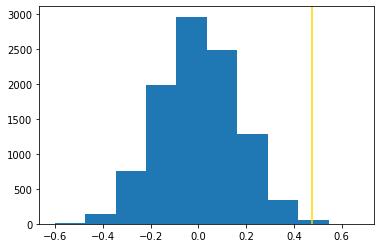

In [7]:
plt.hist(experiments)
plt.axvline(x = a, color = "gold")

c. How many of the simulated random assignments generate an estimated ATE that is at least as large as the actual estimate of the ATE? 

In [8]:
def supa_fun(listy):
    count = 0
    for i in listy:
        if i >= a:
            count += 1
    return str(count) + " simulated random assignments generated an ATE greater than or equal to the actual ATE"
print(supa_fun(experiments))

12 simulated random assignments generated an ATE greater than or equal to the actual ATE


In [9]:
num_larger = '15 simulated random assignments generated an ATE greater than or equal to the actual ATE' 

Please, make sure that you include your result into the printed space using the **`r num_larger`** inline code idiom for this, and all other answers. 

d. What is the implied *one-tailed* p-value? 

In [10]:
p = experiments > a
p = p.astype(int)
p = p.mean()
p

0.0012001200120012002

In [11]:
p_value_one_tailed = 'The p-value for a one-tailed test is ~ .0015' 

e. How many of the simulated random assignments generate an estimated ATE that is at least as large *in absolute value* as the actual estimate of the ATE? 

In [12]:
def abs_supa_fun(listy):
    count = 0
    for i in listy:
        i = abs(i)
        if i >= a:
            count += 1
    return str(count) + " simulated random assignments generated an absolute value ATE greater than or equal to the actual ATE"
print(abs_supa_fun(experiments))

27 simulated random assignments generated an absolute value ATE greater than or equal to the actual ATE


In [13]:
number_more_extreme = '41 simulated random assignments generated an absolute value ATE greater than or equal to the actual ATE'

f. What is the implied two-tailed p-value? 

In [14]:
p = np.abs(experiments) > a
p = p.astype("int")
p = p.mean()
p

0.0027002700270027003

In [15]:
p_value_two_tailed = 'The p-value for a two-tailed test is ~ .004' 

# 2. Randomization Inference Practice
McElhoe and Conner (1986) suggest using a *new* instrument called a "Visiplume" measure pollution. The EPA has a standard method for measuring pollution. Because they're good scientists, McElhoe and Conner want to validate that their instrument is measuring the same levels of pollution as the EPA instrument. 

To do so, they take six readings -- one with each instrument -- at a single site. The recorded response is the ratio of the Visiplume reading to the EPA standard reading, and the values that are recorded are: 0.950, 0.978, 0.762, 0.733, 0.823, and 1.011.

Suppose that we want to test the question, "Do the Visiplume readings and the EPA standard readings produce similar enough estimates?"

> (The point of this question is to demonstrate that randomization inference works as a general inferrential paradigm, without *necessairily* being tied to an experiment.)

1. How would you structure the sharp-null hypothesis -- that Visiplume and the EPA reaings are the same -- in this case? 

2. Suppose that our summary of the data is the sum of the ratios. That is, in the test that we conducted, we obsered $0.95 + ... + 1.011 = 5.257$. Using randomization inference, test the sharp-null hypothesis that you formed in the first part of the question. Produce a histogram of the test statistic under the sharp null that compares against the 5.257 value from the test, and also produce a two-sided p-value. 

# 2.1 (Brandon's Response)

We would structure the sharp-null hypothesis, which is there is no difference between Visiplume and the EPA readings. Since the readings from the Visiplum machine are in a ratio form .95/100, we can say (via the sharp null) that the variance is the same for the EPA (100/.95). In other words, we are comparing the noise of the visiplume machine to the EPA machine.

# 2.2 (Brandon's Response)

In [16]:
# What are we wanting to see? That there is no difference in the sharp null

visiplume_vector = [.95, .978, .762, .733, .823, 1.011]

visiplume_vector_sum = sum(visiplume_vector)

number_of_observations = len(visiplume_vector)

def reciprocal(vector):
    reciprocal_vector = []
    for i in visiplume_vector:
        reciprocal_vector.append(1/i)
    return reciprocal_vector

visiplume_df = pd.DataFrame({
    "visiplume" : visiplume_vector,
    "reciprocal" : reciprocal(visiplume_vector)
})

visiplume_df
    
    
def random(number_of_observations):
    a = np.repeat([0,1], repeats = (number_of_observations/2))
    np.random.shuffle(a)
    return a


# print(sum(visiplume_vector))

# If 0 then use visiplume. Elif 1 then use reciprocal
# meauring noise instead

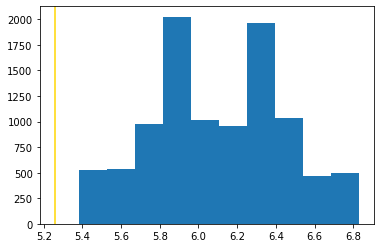

In [17]:
# visiplume_df["treat"] = random(number_of_observations)
# visiplume_df



def final_treat_vector(df):
    """Passes df as arguement. df must have columns named: treat, visiplume & reciprocal."""
    count = 0
    final = []
    for i in df["treat"]:
        if i == 0:
            final.append(df["visiplume"][count])
            count += 1
        elif i == 1:
            final.append(df["reciprocal"][count])
            count += 1
    return final




# visiplume_df["Y"] = final_treat_vector(visiplume_df)

# results = visiplume_df[["treat", "Y"]].groupby("treat").mean()
# ate = results.diff()["Y"][1]
# ate


# This is the ate.

# def sim_experiment(df, number_of_observations): 
#     df["treat"] = random(number_of_observations)
#     df["Y"] = final_treat_vector(df)
#     results = df[["treat", "Y"]].groupby("treat").mean()
#     ate = results.diff()["Y"][1]
#     return ate


# This is the sum of Y.

def sim_experiment(df, number_of_observations):
    df["treat"] = random(number_of_observations)
    df["Y"] = final_treat_vector(df)
    final_sum = sum(df["Y"])
    return final_sum

experiments = []
for i in range(1, 10000):
    experiments.append(sim_experiment(visiplume_df, number_of_observations))

plt.hist(experiments)
plt.axvline(x = visiplume_vector_sum, color = "gold")

# simple random assignment instead of complete?

In [18]:
# new_list = []
# for i in experiments:
#     i = float(i)
#     new_list.append(i)

p = np.mean(experiments) > visiplume_vector_sum
p = p.astype(int)
p = p.mean()
p

1.0

In [19]:
# we can't reject the null because 

In [20]:
p_value = '0' 

# randomization inference works even when you don't have an experiment
# p_value = 0

# 3. Term Limits Aren't Good. 

Naturally occurring experiments sometimes involve what is, in effect, block random assignment. For example, [Rocio Titiunik](https://sites.google.com/a/umich.edu/titiunik/publications) , in [this paper](http://www-personal.umich.edu/~titiunik/papers/Titiunik2016-PSRM.pdf) studies the effect of lotteries that determine whether state senators in TX and AR serve two-year or four-year terms in the aftermath of decennial redistricting. These lotteries are conducted within each state, and so there are effectively two distinct experiments on the effects of term length.

The "thoery" in the news (such as it is), is that legislators who serve 4 year terms have more time to slack off and not produce legislation. If this were true, then it would stand to reason that making terms shorter would increase legislative production. 

One way to measure legislative production is to count the number of bills (legislative proposals) that each senator introduces during a legislative session. The table below lists the number of bills introduced by senators in both states during 2003. 

In [21]:
d = pd.read_stata('./data/titiunik_2010.dta')


# 3a

a. Using either `pandas`, group the data by state and report the mean number of bills introduced in each state. Does Texas or Arkansas seem to be more productive? Then, group by two- or four-year terms (ignoring states). Do two- or four-year terms seem to be more productive? **Which of these effects is causal, and which is not?** Finally, group by state and term-length. How, if at all, does this change what you learn? 

# Brandon's Responses

In [22]:
group_1 = d[["bills_introduced", "texas0_arkansas1"]].groupby("texas0_arkansas1").mean()
print(group_1)
group_1_diff = group_1.diff()["bills_introduced"][1]
group_1_diff

                  bills_introduced
texas0_arkansas1                  
0                        68.774194
1                        25.514286


-43.259907834101384

Texas seems to be more productive with ~ 43 more bills introduced, when compared to Arkansas. In other words, Texas had ~69 bills introduced, while Arkansas had ~ 26 bills introduced.

In [23]:
group_2 = d[["term2year", "bills_introduced"]].groupby("term2year").mean()
group_2 # 0 is 4 year; 1 is 2 year

,bills_introduced
term2year,
0,53.090909
1,38.575758


Two-year terms seem to be more productive with ~ 39 bills introduced in two years. ~ 53 bills were introduced during a four-year term, which means ~ 26 bills were introduced in a two-year timeframe.

The casual effect can be associated with senators being randomly assigned to two- or four-year terms. A causal effect is not associated with the state level as there is no random assignment of senators to either Texas or Arkansas.

In [24]:
# Group by state and term-length

In [25]:
group_3 = d[["term2year", "bills_introduced", "texas0_arkansas1"]].groupby(["texas0_arkansas1", "term2year"]).mean()
group_3

bills_introduced
texas0_arkansas1 term2year                  
0                0                 76.875000
                 1                 60.133333
1                0                 30.705882
                 1                 20.611111

When grouping by the state and term-length, it appears a two-year term is more effective (when compared to how many bills a four-year term introduces in two-years).

# 3b

b. For each state, estimate the standard error of the estimated ATE. 

In [26]:
 #3.4

In [27]:
# Standard error of the sample mean? 

In [28]:
ateTexas = group_3.diff()["bills_introduced"][0]
ateTexas # 16.7...
ateT = ateTexas[1]
ateT = abs(ateT)
ateT

16.741666666666667

In [29]:
ateArkansas = group_3.diff()["bills_introduced"][1]
ateArkansas # Index 1 10.09...
ateA = ateArkansas[1]
ateA = abs(ateA)
ateA

10.094771241830067

In [30]:
# standard error for texas # 0 = 4 year; and 

# variance of the vector of potential outcomes to 2 year (needs to be an array)

# pull a vector of all outcomes for Texas 2 year

po_4_t =[]
count_index = 0
for i in d["term2year"]:
    if i == 0 and (d["texas0_arkansas1"][count_index] == 0):
        value = d["bills_introduced"][count_index]
        po_4_t.append(value)
        count_index += 1
    else:
        count_index += 1
# print(po_4_t)

var_t_4_year = np.var(po_4_t)



po_2_t =[]
count_index = 0
for i in d["term2year"]:
    if i == 1 and (d["texas0_arkansas1"][count_index] == 0):
        value = d["bills_introduced"][count_index]
        po_2_t.append(value)
        count_index += 1
    else:
        count_index += 1
# print(po_2_t)


var_t_2_year = np.var(po_2_t)


#########################################################################################


# pull a vector of all outcomes for Arkansas 2 year

po_4_a =[]
count_index = 0
for i in d["term2year"]:
    if i == 0 and (d["texas0_arkansas1"][count_index] == 1):
        value = d["bills_introduced"][count_index]
        po_4_a.append(value)
        count_index += 1
    else:
        count_index += 1
# print(po_4_a)

var_a_4_year = np.var(po_4_a)




po_2_a =[]
count_index = 0
for i in d["term2year"]:
    if i == 1 and (d["texas0_arkansas1"][count_index] == 1):
        value = d["bills_introduced"][count_index]
        po_2_a.append(value)
        count_index += 1
    else:
        count_index += 1
# print(po_2_a)

var_a_2_year = np.var(po_2_a)



In [31]:
count_index= 0
count_4_year_t = 0
count_2_year_t = 0
for i in d["term2year"]:
    if i == 0 and (d["texas0_arkansas1"][count_index] == 0):
        count_4_year_t += 1
        count_index +=1
    elif i == 1 and d["texas0_arkansas1"][count_index] == 0:
        count_2_year_t += 1
        count_index += 1
    else: 
        count_index += 1
# print(count_4_year_t)
# print(count_2_year_t)

In [32]:
count_index = 0
count_4_year_a = 0
count_2_year_a = 0

for i in d["term2year"]:
    if i == 0 and (d["texas0_arkansas1"][count_index] == 1):
        count_4_year_a += 1
        count_index +=1
    elif i == 1 and d["texas0_arkansas1"][count_index] == 1:
        count_2_year_a += 1
        count_index += 1
    else:
        count_index += 1
# print(count_4_year_a)
# print(count_2_year_a)
# print(count_index)

In [33]:
# covariance in 3.3

In [34]:
# standard error of texas
a = var_t_4_year/(31 - count_2_year_t)
b = var_t_2_year/count_2_year_t

se_t = np.sqrt(a+b)
print("The standard error for Texas is " + str(se_t))

The standard error for Texas is 9.04274905515668


In [35]:
# standard error of arkansas
a = var_a_4_year/(35 - count_2_year_a)
b = var_a_2_year/count_2_year_a

se_a = np.sqrt(a+b)
se_a
print("The standard error for Arkansas is " + str(se_a))

The standard error for Arkansas is 3.2959680182586952


In [36]:
se_ate = 'The standard error for Texas is ~ 9.04, while the standard error for Arkansas is ~ 3.295'

# 3c

c. Use equation (3.10) to estimate the overall ATE for both states combined. 

In [37]:
overall_ate = (ateT*(len(d[d["texas0_arkansas1"] == 0])/len(d))) + (ateA*(len(d[d["texas0_arkansas1"] == 1])/len(d)))
overall_ate

13.216797880768471

In [38]:
overall_ate = '~13.217'

# 3d

d. Explain why, in this study, simply pooling the data for the two states and comparing the average number of bills introduced by two-year senators to the average number of bills introduced by four-year senators leads to biased estimate of the overall ATE. 

#### Brandon's Response to 3d

This leads to a biased estimate because it is not blocking for each state. The overall ATE aggregates each states individual ATE.

# 3e

e. Insert the estimated standard errors into equation (3.12) to estimate the stand error for the overall ATE. 

In [39]:
t = (se_t**2)*((len(d[d["texas0_arkansas1"] == 0])/len(d))**2)
a = (se_a**2)*((len(d[d["texas0_arkansas1"] == 1])/len(d))**2)

se_overall_ate = np.sqrt(t + a)
se_overall_ate

4.5929313654878525

In [40]:
se_overall_ate = '~4.59'

# 3f

f. Use randomization inference to test the sharp null hypothesis that the treatment effect is zero for senators in both states. Here we mean: estimate the *overall ate* (which is, the weighted average of the block ate) as the internal part of your RI loop. 

In [41]:
##### Dataframe for each state #######

a_df = d[d["texas0_arkansas1"] == 1]
t_df = d[d["texas0_arkansas1"] == 0]

In [42]:
############## Code ###################

def randomize(d):
#     a = np.repeat([0,1], repeats = (number_of_participants/2))
    a = np.random.choice([0, 1], size = len(d), replace = True)
    np.random.shuffle(a)
    return a


def simulated_experiment(df):
    df["treat"] = randomize(df)
    results = df[["bills_introduced", "treat"]].groupby("treat").mean().astype(np.float32)
    ate = results.diff()["bills_introduced"][1]
    return ate 



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


p value = 0.001001001001001001


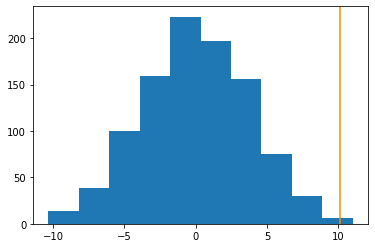

In [43]:
######### Here for Arkansas ##########

a_experiments = []
for i in range(1, 1000):
    a_experiments.append(simulated_experiment(a_df))
    
plt.hist(a_experiments)
plt.axvline(x = ateA, color = "darkorange")

p = a_experiments > ateA
p = p.astype(int)
p = p.mean()
print("p value = " + str(p))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


p value = 0.036036036036036036


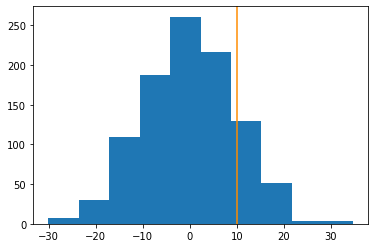

In [44]:
######## Here for Texas ####### 

t_experiments = []
for i in range(1, 1000):
    t_experiments.append(simulated_experiment(t_df))
    
plt.hist(t_experiments)
plt.axvline(x = ateA, color = "darkorange")

p = t_experiments > ateT
p = p.astype(int)
p = p.mean()
print("p value = " + str(p))

In [45]:
p_value = 'The p value for Arkansas is ~ .003, while the p value for Texas is ~ .047' 



# 3g

Text(0.5, 1.0, 'Number of bills introduced during a 4 year term in Arkansas')

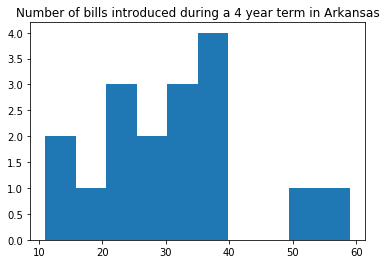

In [46]:
a_df_c = a_df[a_df["term2year"] == 0]["bills_introduced"]
plt.hist(a_df_c)
plt.title("Number of bills introduced during a 4 year term in Arkansas")

Text(0.5, 1.0, 'Number of bills introduced during a 2 year term in Arkansas')

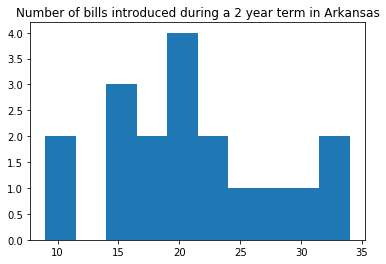

In [47]:
a_df_t = a_df[a_df["term2year"] == 1]["bills_introduced"]
plt.hist(a_df_t)
plt.title("Number of bills introduced during a 2 year term in Arkansas")

Text(0.5, 1.0, 'Number of bills introduced during a 4 year term in Texas')

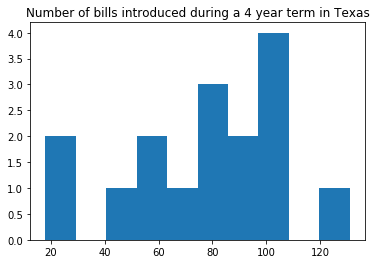

In [48]:
t_df_c = t_df[t_df["term2year"] == 0]["bills_introduced"]
plt.hist(t_df_c)
plt.title("Number of bills introduced during a 4 year term in Texas")

Text(0.5, 1.0, 'Number of bills introduced during a 2 year term in Texas')

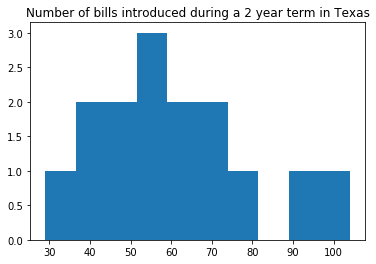

In [49]:
t_df_t = t_df[t_df["term2year"] == 1]["bills_introduced"]
plt.hist(t_df_t)
plt.title("Number of bills introduced during a 2 year term in Texas")

# 3g

g. **IN Addition:** Plot histograms for both the treatment and control groups in each state (for 4 histograms in total).

# 3. Cluster Randomization
Use the data in the table below to explore the consequences of cluster random assignment. (Assume that there are three clusters in treatment and four clusters in control.) Note that there is no randomization inference that is necessary to complete this problem because we have observed the *impossible* **science table**.  


In [50]:
d = pd.read_csv('./data/clustering_data.csv')


# a. 

Suppose the clusters are formed by grouping observations {1,2}, {3,4}, {5,6}, ... , {13,14}. Use equation (3.22) to calculate the standard error. Note that, because we have the full schedule of potential outcomes -- the science table -- it is possible to estimate $cov(\bar{Y}_{j}(0), \bar{Y}_{j}(1))$. If we did not posess this information, then we would need to work with equation 3.23. 

In [51]:
def clustered_se(fill_out_args): 
    '''
    do stuff
    '''
# equation number 3.2.2.
# Now suppose our clusters are formed in a different way, and think
# about why one is way more efficient than anyone.

In [52]:
y0_list = [[0,2], [2,4], [5, 6], [7, 9], [14, 15], [16, 17], [17,19]]
y1_list =[[0,0], [1,4], [0,0], [3, 3], [12, 8], [8, 15], [6, 17]]

def meanish(l):
    mean_list = []
    for i in l:
        mean_list.append(stat.mean(i))
    return mean_list
        
y0_cluster_list = meanish(y0_list)
y1_cluster_list = meanish(y1_list)

# print(y0_cluster_list)
# print(y1_cluster_list)

df_c = pd.DataFrame({
    "y0": y0_cluster_list,
    "y1": y1_cluster_list
})

# df_c

In [53]:
m = float(3)
n = float(len(d))
k = float(7)

a = (m*np.var(df_c["y0"]))/(n-m)
# print(type(a))
b = ((n-m)*np.var(df_c["y1"]))/m
# print(type(b))


In [54]:
# covariance 

y0_mean = df_c["y0"].mean()
y0_vector = []

# print(y0_mean)

for i in df_c["y0"]:
    y0_vector.append(i - y0_mean)
    
y1_mean = df_c["y1"].mean()
y1_vector = []

# print(y1_mean)

for i in df_c["y1"]:
    y1_vector.append(i - y1_mean)  
    
answer = 2*(np.array(y0_vector) * np.array(y1_vector))

answer = float(answer.mean())
# type(answer)

In [55]:
result = np.sqrt((1/(k-1))*(a+b+answer))
print("The standard error is ~ " + str(round(result, 2)))

# 5.13

The standard error is ~ 5.13


# b. 

Suppose that clusters are instead formed by grouping observations {1,14}, {2,13}, {3,12}, ... , {7,8}. Use equation (3.22) to calculate the standard error assuming half of the clusters are randomly assigned to treatment. 

In [56]:
# d

In [57]:
y0_list = [[0,19], [2,17], [2, 17], [4, 16], [5, 15], [6, 14], [7,9]]
y1_list =[[0,17], [0,6], [1,15], [4, 8], [0, 8], [0, 12], [3, 3]]

def meanish(l):
    mean_list = []
    for i in l:
        mean_list.append(stat.mean(i))
    return mean_list
        
y0_cluster_list = meanish(y0_list)
y1_cluster_list = meanish(y1_list)

# print(y0_cluster_list)
# print(y1_cluster_list)

df_c = pd.DataFrame({
    "y0": y0_cluster_list,
    "y1": y1_cluster_list
})



m = float(3)
n = float(len(d))
k = float(7)

a = (m*np.var(df_c["y0"]))/(n-m)
# print(type(a))
b = ((n-m)*np.var(df_c["y1"]))/m
# print(type(b))



y0_mean = df_c["y0"].mean()
y0_vector = []

# print(y0_mean)

for i in df_c["y0"]:
    y0_vector.append(i - y0_mean)
    
y1_mean = df_c["y1"].mean()
y1_vector = []

# print(y1_mean)

for i in df_c["y1"]:
    y1_vector.append(i - y1_mean)  
    
answer = 2*(np.array(y0_vector) * np.array(y1_vector))

answer = float(answer.mean())

result = np.sqrt((1/(k-1))*(a+b+answer))


print("The standard error is ~ " +(str(round(result, 2))))

The standard error is ~ 1.69


c. Why do the two methods of forming clusters lead to different standard errors? What are the implications for the design of cluster randomized experiments? 

# Brandon's Answer

When the clusters consists of one value from one extreme end, and another from the opposite extreme end, the means of each cluster are closer to true mean of dataset. When the clusters consist of one value from one end, and another value right next to it, then the means of the clusters vary much further from the true mean of the data set.

# 4. Sell Phones? 

Suppose that you are working for a company that sells online display advertisements. (The generation's smartest minds, lost to chasing those clicks...) On client, a consumer electronics company is considering using your ad network to run a large campaign. In order to evaluate its effectiveness, they want to run a smaller experiment to estimate the causal impact of the ads on sales of one of their smartphones. 

**The facts** 

- The experiment campaign will run for one week within a randomly samples sub-population of 800,000 users
- The cost per *impression* -- someone seeing the ad -- is $0.20. 
- The client tells you that they make a profit of \$100 every time someone purchases one of their smarphones (e.g. the device costs \$400 to manufacture, and are sold for \$500.)
- When they are **not** running the advertising campaign, the historic rate of purchasing has been that 0.004 of the population (0.4%) makes a purchase of this smartphone. 
- Assume that everyone who is assigned to the treatment group actually sees the ad. 
- Suppose there are no long-run effects and all the effects are measured within that week.

a. How large does the treatment effect need to be in order for the campaign to have positive value for the company? 

# Brandon's Response

The treatment effect must be greater than .002

Greater than 4%?

b. Suppose the measured effect were to be 0.3 percentage points. If users are split 50:50 between the treatment group (exposed to iPhone ads) and control group (exposed to unrelated advertising or nothing; something you can assume has no effect), what will be the confidence interval of your estimate on whether people purchase the phone?

In [58]:
# confidence intervals need to be around a point estimate 

In [59]:
p = ((0.007*400000 + 0.004*400000)/800000)
se = math.sqrt(p*(1-p)*(1/(400000) + 1/(400000)))
confidence_interval = se*1.96
ci_lower = .003 - confidence_interval
ci_higher = .003 + confidence_interval

print(ci_lower)
print(ci_higher)

0.0026758658333344044
0.0033241341666655957


  + **Hint:** The standard error for a two-sample proportion test is $\sqrt{p(1-p)*(\frac{1}{n_{1}}+\frac{1}{n_{2}})}$ where $p=\frac{x_{1}+x_{2}}{n_{1}+n_{2}}$, where $x$ and $n$ refer to the number of “successes” (here, purchases) over the number of “trials” (here, site visits). The length of each tail of a 95% confidence interval is calculated by multiplying the standard error by 1.96.
  
c. Based on this confidence interval, if the effect were 0.3 percentage points, would you recommend running the production campaign among the whole population? Why or why not?

**Yes, because the lower cofidence interval is .0026, which is more than the baseline of where they are before treatment**

d. Your boss at the newspaper, worried about potential loss of revenue, says he is not willing to hold back a control group any larger than 1% of users. What would be the width of the confidence interval for this experiment if only 1% of users were placed in the control group and 99% were placed in the treatment group?

In [60]:
p = ((0.007*792000 + 0.004*8000)/800000)
se = math.sqrt(p*(1-p)*(1/(792000) + 1/(8000)))
confidence_interval = se*1.96
ci_lower = .003 - confidence_interval
ci_higher = .003 + confidence_interval

# print(ci_lower)
# print(ci_higher)

print("The lower bound of the confidence interval would be ~ " + str(round(ci_lower, 4)) + " and the upper bound would be ~ " + str(round(ci_higher, 4)) )

The lower bound of the confidence interval would be ~ 0.0012 and the upper bound would be ~ 0.0048


# 5. Sports Cards
Here you will find a set of data from an auction experiment by John List and David Lucking-Reiley ([2000](https://drive.google.com/file/d/0BxwM1dZBYvxBNThsWmFsY1AyNEE/view?usp=sharing)).  

In [61]:
d = pd.read_csv('./data/list_data_2019.csv')

In [62]:
# print(len(d))

In this experiment, the experimenters invited consumers at a sports card trading show to bid against one other bidder for a pair trading cards.  We abstract from the multi-unit-auction details here, and simply state that the treatment auction format was theoretically predicted to produce lower bids than the control auction format.  We provide you a relevant subset of data from the experiment.

In this question, we are asking you to produce p-values and confidence intervals in three different ways: (1) Using a `t.test`, using a regression, and using randomization inference. 

a. Using a `t.test`, compute a 95% confidence interval for the difference between the treatment mean and the control mean.

In [69]:
t_test_result = 'replace text'
# find a preloaded t-test
# stats.ttest_ind

treatment = d[d['uniform_price_auction']==1].bid
control = d[d['uniform_price_auction']==0].bid

t_test_result = stats.ttest_ind(treatment, control)
t_test_result
# str(t_test_result)


# ate of difference between the two means / and the SD for??? variance of treatment and control


Ttest_indResult(statistic=-2.8211439451802223, pvalue=0.006314795950663972)

In [70]:
import statsmodels.stats.api as sms

ci = sms.CompareMeans(sms.DescrStatsW(treatment), sms.DescrStatsW(control))
print(ci.tconfint_diff(usevar='unequal'))

(-20.854624065199104, -3.557140640683249)


In [71]:
t_test_result

Ttest_indResult(statistic=-2.8211439451802223, pvalue=0.006314795950663972)

In [72]:
# import numpy as np
# import scipy.stats


# def mean_confidence_interval(data, confidence=0.95):
#     a = 1.0 * np.array(data)
#     n = len(a)
#     m, se = np.mean(a), scipy.stats.sem(a)
#     h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h
# print(mean_confidence_interval(d[d['uniform_price_auction']==1].bid))
# print(mean_confidence_interval(d[d['uniform_price_auction']==0].bid))


You should be able to look into `str(t_test_result)` to find the pieces that you want to pull to include in your written results.

b. In plain language, what does this confidence interval mean? (Put your answer in bold!) 


**There is a 95% chance the true ATE lies between the lower and upper bound confidence intervals**



c. Regression on a binary treatment variable turns out to give one the same answer as the standard analytic formula you just used.  Demonstrate this by regressing the bid on a binary variable equal to 0 for the control auction and 1 for the treatment auction.

In [73]:
mod = smf.ols(formula = 'bid ~ uniform_price_auction', data = d)
mod_fit = mod.fit()
mod_fit.summary()

# mod = smf.ols()
# mod_fit = mod.fit()
# mod_fit.summary()

# Regression in stats model formulas 
# sm.ols(Y ~ treat + c data = f)
# mod.fit()
# nf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bid   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     7.959
Date:                Fri, 04 Oct 2019   Prob (F-statistic):            0.00631
Time:                        22:37:58   Log-Likelihood:                -291.41
No. Observations:                  68   AIC:                             586.8
Df Residuals:                      66   BIC:                             591.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                28.8235      3.059      9.421      0.000      22.715      34.932
uniform_price_auction   -12.2059      4.327     -2.821      0.006     -20.844      -3.568
==============================================================================
Omnibus:                       10.797   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.775
Skew:                           0.876   Prob(JB):                      0.00457
Kurtosis:                       3.856   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. Calculate the 95% confidence interval you get from the regression. There is a built in, 

In [74]:
mod_fit.conf_int(0.05)

,0,1
Intercept,22.715343,34.931716
uniform_price_auction,-20.844162,-3.567603


e. On to p-values. What p-value does the regression report? Note: please use two-tailed tests for the entire problem. (Should be able to pull this from the summary. And, you should try to do so with a call that _name_ calls for the parameter you're interested in, in this case, `uniform_price_auction`.) 

In [75]:
# p_value = .006 

mod_fit.pvalues["uniform_price_auction"]

0.006314795950663969

f. Now compute the same p-value using randomization inference.

In [76]:
# compute the ate

a = d[["uniform_price_auction", "bid"]].groupby("uniform_price_auction").mean()
ate = a.diff()["bid"][1]
ate


-12.205882352941178

In [77]:
# randomization inference
def random(number_of_observations):
    a = np.repeat([0,1], repeats = (number_of_observations/2))
    np.random.shuffle(a)
    return a


def run_sim_experiment(df, number_per_group):
    """df, number_per_group, which must be an int"""
    df["treat"] = random(number_per_group)
    results = df[["treat", "bid"]].groupby("treat").mean()
    results = results.diff()["bid"][1]
    return results


In [78]:
experiments = []
for i in range(1, 10000):
    experiments.append(run_sim_experiment(d, len(d)))

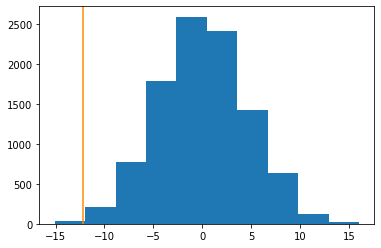

In [79]:
plt.hist(experiments)
plt.axvline(x = ate, color = "darkorange")

In [80]:
p = experiments < ate
p = p.astype(int)
p = p.mean()
print("The p value is ~ " + str(round(p, 4)))

The p value is ~ 0.0029


g. Pull the same p-value from the `t.test`. 

In [81]:
t_test_result

Ttest_indResult(statistic=-2.8211439451802223, pvalue=0.006314795950663972)

h. Compare the two p-values in parts (e) and (f). Are they much different? Why or why not? How might your answer to this question change if the sample size were different?

Box 3.7 pg. 65
Randomization inference is more precise?

# Brandon's Response

The p-value for the randomization inference is smaller than the p-value from the t-test. Since a t-test operates on the assumption of normally distributed data, the t-test may be different. In other words, if the outcome is skewed, the randomization inference may due a better job at estimating the p-value. 

If the sample size increases, then the t-test may be more accurate if the data becomes more normally distributed (Central Limit Theorom) as it operates on such an assumption. 